In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
from itertools import chain

In [2]:
marker_genes = {
    'ISC/EB': ['AAEL013544', 'AAEL025606'], # Klu, Delta
    'Cardia': ['AAEL004522'], # gambicin
    'EC-like': ['AAEL008769', 'AAEL009330'], # SP24D, AeCA  # ['AAEL007818', 'AAEL001863'], # trypsin 3A1, Carboxypeptidase
    'EC': ['AAEL017445'], # Nubbin
    'EE': ['AAEL002769', 'AAEL002733'], # prospero, NPF
    'VM': ['AAEL001673'], # Actin
    'FBC': ['AAEL008789'], # apoLp-III 'https://www.science.org/doi/10.1126/science.abc0322#supplementary-materials' (table s5)
    'HC': ['AAEL008658'], # LRIM16
}

# read in data

In [3]:
# merged data
adata = sc.read_h5ad('../merge_rep/4.Annotation.h5ad')
adata

AnnData object with n_obs × n_vars = 7147 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden_res'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-rep1', 'mean_counts-rep1', 'pct_dropout_by_counts-rep1', 'total_counts-rep1', 'n_cells_by_counts-rep2', 'mean_counts-rep2', 'pct_dropout_by_counts-rep2', 'total_counts-rep2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_res_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_pca_raw', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
adata1 = sc.read_h5ad('../scdata_rep1/6.Annotation.h5ad')
adata1

AnnData object with n_obs × n_vars = 4350 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden_res'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_res_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
# read in data marked doublets
dblets1 = sc.read('../scdata_rep1/mark_doublet/mark_doublet.seurat_obj.h5ad')
dblets1

AnnData object with n_obs × n_vars = 4531 × 11663
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN_0.25_0.09_181', 'DF.classifications_0.25_0.09_181'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [6]:
dblets1.obs['DF.classifications_0.25_0.09_181'].value_counts()

DF.classifications_0.25_0.09_181
Singlet    4350
Doublet     181
Name: count, dtype: int64

In [7]:
adata2 = sc.read_h5ad('../scdata_rep2/6.Annotation.h5ad')
adata2

AnnData object with n_obs × n_vars = 2797 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden_res'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_res_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
# read in data marked doublets
dblets2 = sc.read('../scdata_rep2/mark_doublet/mark_doublet.seurat_obj.h5ad')
dblets2

AnnData object with n_obs × n_vars = 2914 × 10579
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN_0.25_0.09_117', 'DF.classifications_0.25_0.09_117'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [9]:
dblets2.obs['DF.classifications_0.25_0.09_117'].value_counts()

DF.classifications_0.25_0.09_117
Singlet    2797
Doublet     117
Name: count, dtype: int64

In [10]:
# subset cluster
c1 = sc.read('../merge_subset/1.cluster1.Annotation.h5ad')
c2 = sc.read('../merge_subset/2.cluster2.Annotation.h5ad')
c3 = sc.read('../merge_subset/3.cluster3.Annotation.h5ad')

Only considering the two last: ['.Annotation', '.h5ad'].
Only considering the two last: ['.Annotation', '.h5ad'].
Only considering the two last: ['.Annotation', '.h5ad'].
Only considering the two last: ['.Annotation', '.h5ad'].
Only considering the two last: ['.Annotation', '.h5ad'].
Only considering the two last: ['.Annotation', '.h5ad'].


## mark cluster name

In [11]:
cluster_name_dict = {
    '0': 'EC-like',
    '4': 'HC',
}

adata.obs['cluster_name'] = pd.concat(
    [
        adata.obs[~adata.obs['leiden_res'].isin(['1','2','3'])]['leiden_res'].map(cluster_name_dict),
        c1.obs['leiden_res'].map(lambda x: 'ISC/EB' if x == '2' else 'FBC'),
        c2.obs['leiden_res'].map(lambda x: 'EE' if x in ('4', '6') else 'EC'),
        c3.obs['leiden_res'].map(lambda x: 'Cardia' if x == '2' else 'VM'),
    ]
)

adata.obs['cluster_name'] = adata.obs['cluster_name'].astype('category')

adata.obs['cluster_name'] = adata.obs[
        'cluster_name'
    ].cat.reorder_categories(marker_genes.keys())

adata.obs['cluster_name'].unique()

['EC-like', 'FBC', 'VM', 'ISC/EB', 'Cardia', 'EE', 'EC', 'HC']
Categories (8, object): ['ISC/EB', 'Cardia', 'EC-like', 'EC', 'EE', 'VM', 'FBC', 'HC']

In [12]:
adata.obs['cluster_name'].value_counts()

cluster_name
EC-like    5684
FBC         665
EC          247
VM          229
ISC/EB      185
EE           67
Cardia       45
HC           25
Name: count, dtype: int64

In [13]:
adata.obs['cluster_name_raw'] = adata.obs['cluster_name']
adata.obs['cluster_name'] = adata.obs.apply(
    lambda x: 'EC' if (x['cluster_name_raw'] == 'Cardia') and (x['batch'] == 'rep2') else x['cluster_name_raw'],
    axis=1
)

adata.obs['cluster_name'] = adata.obs['cluster_name'].astype('category')

adata.obs['cluster_name'] = adata.obs[
        'cluster_name'
    ].cat.reorder_categories(marker_genes.keys())

adata.obs[['cluster_name', 'batch']].value_counts()

cluster_name  batch
EC-like       rep1     3306
              rep2     2378
FBC           rep1      632
EC            rep2      199
ISC/EB        rep1      134
VM            rep2      120
              rep1      109
EC            rep1       54
EE            rep1       53
ISC/EB        rep2       51
Cardia        rep1       39
FBC           rep2       33
HC            rep1       23
EE            rep2       14
HC            rep2        2
Name: count, dtype: int64

## make umap DataFrame

In [14]:
umap = pd.DataFrame(
    adata.obsm['X_umap'], 
    columns=['umap1', 'umap2'],
    index=adata.obs.index
)

umap

,umap1,umap2
AAACCCAAGACTGTTC-1-rep1,9.257954,9.398469
AAACCCAAGTGGAAAG-1-rep1,9.466644,5.852876
AAACCCACAACACGTT-1-rep1,10.493890,11.623531
AAACCCACACCTGTCT-1-rep1,1.974819,7.301327
AAACCCACATTGACAC-1-rep1,11.218186,8.606311
...,...,...
TTTGATCCAGTGGCTC-1-rep2,10.000892,8.252073
TTTGATCTCATGTCAG-1-rep2,12.349058,9.229651
TTTGGAGCAATCGAAA-1-rep2,11.630293,9.187199
TTTGGAGGTTCCTACC-1-rep2,15.157217,8.956130


# plot doublets

In [66]:
pdf1 = dblets1.obs[['nFeature_RNA', 'DF.classifications_0.25_0.09_181']]
pdf1.columns = ['nFeature_RNA', 'doublet_detect']
pdf2 = dblets2.obs[['nFeature_RNA', 'DF.classifications_0.25_0.09_117']]
pdf2.columns = ['nFeature_RNA', 'doublet_detect']

pdf = pd.concat([pdf1, pdf2], axis=0)
pdf

,nFeature_RNA,doublet_detect
AAACCCAAGACTGTTC-1,158,Singlet
AAACCCAAGAGTGGCT-1,1801,Doublet
AAACCCAAGTGGAAAG-1,422,Singlet
AAACCCACAACACGTT-1,627,Singlet
AAACCCACACCTGTCT-1,180,Singlet
...,...,...
TTTGATCCAGTGGCTC-1,213,Singlet
TTTGATCTCATGTCAG-1,238,Singlet
TTTGGAGCAATCGAAA-1,247,Singlet
TTTGGAGGTTCCTACC-1,275,Singlet


/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


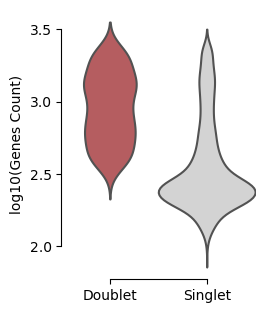

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=pdf['doublet_detect'], 
    y=np.log10(pdf['nFeature_RNA']),
    palette=[c[3], 'lightgrey'],
    order=['Doublet', 'Singlet'],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('log10(Genes Count)')
ax.set_yticks([2, 2.5, 3, 3.5])

ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.doublet.png', dpi=600, bbox_inches='tight')

# plot rep

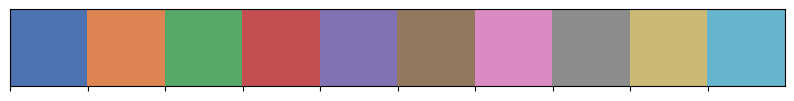

In [30]:
sns.palplot(c)

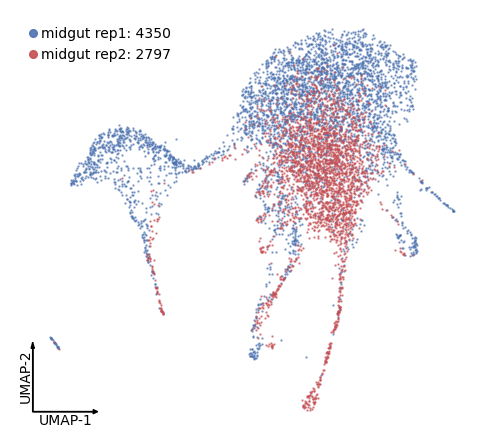

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 5.5))

c = sns.color_palette('deep')
set1 = sns.color_palette('Set1')
set2 = sns.color_palette('Set2')

grp_color = {
    'rep1': c[0],
    'rep2': c[3],
}

for batch in adata.obs['batch'].unique():
    pdf = umap[adata.obs['batch'] == batch]
    l1, = ax.plot(
        pdf['umap1'], pdf['umap2'], '.', color=grp_color[batch],
        alpha=0.6, ms=1.5)

ax.arrow(
    -6.5, -3, 0, 3, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -6.5, -3, 3.8, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-4.4, -3.1, 'UMAP-1', ha='center', va='top')
ax.text(-6.5, -1.3, 'UMAP-2', ha='right', va='center', rotation=90)

for i, (rep, color) in enumerate(grp_color.items()):
    x = -6.5; y = 15

    ax.plot(x, y - i, '.', color=color, mec=color, ms=11, alpha=0.9)
    ax.text(
        x + 0.5, y - i - 0.05, 
        f'midgut {rep}: {len(adata.obs[adata.obs["batch"] == rep])}', 
        ha='left', va='center',
    )

plt.savefig('./plots/f1.rep.umap_merge.png', dpi=600, bbox_inches='tight')

# plot UMAP

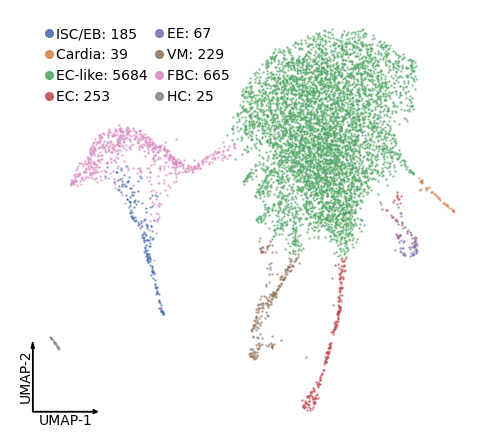

In [92]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 5.5))

c = sns.color_palette('deep')
set1 = sns.color_palette('Set1')
set2 = sns.color_palette('Set2')

grp_color = {
    'ISC/EB': c[0],
    'Cardia': c[1],
    'EC-like': c[2],
    'EC': c[3],
    'EE': c[4],
    'VM': c[5],
    'FBC': c[6],
    'HC': c[7],
}

for lb in marker_genes.keys():
    pdf = umap[adata.obs['cluster_name'] == lb]
    l1, = ax.plot(
        pdf['umap1'], pdf['umap2'], '.', color=grp_color[lb],
        alpha=0.6, ms=1.5)

ax.arrow(
    -6.5, -3, 0, 3, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -6.5, -3, 3.8, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-4.4, -3.1, 'UMAP-1', ha='center', va='top')
ax.text(-6.5, -1.3, 'UMAP-2', ha='right', va='center', rotation=90)

for i, (cell, color) in enumerate(grp_color.items()):
    x = -5.5; y = 15

    if i <= 3:
        ax.plot(x, y - i, '.', color=color, mec=color, ms=11, alpha=0.9)
        ax.text(x + 0.5, y - i - 0.05, 
        f'{cell}: {len(adata.obs[adata.obs["cluster_name"] == cell])}', 
        ha='left', va='center')
    elif i > 3:
        ax.plot(x + 7, y - i + 4, '.', color=color, mec=color, ms=11, alpha=0.9)
        ax.text(x + 7 + 0.5, y - i - 0.05 + 4, 
        f'{cell}: {len(adata.obs[adata.obs["cluster_name"] == cell])}', 
        ha='left', va='center')

plt.savefig('./plots/f2.clust.umap_merge.png', dpi=600, bbox_inches='tight')

# plot stack barplot

In [15]:
adata.obs[['cluster_name', 'batch']].value_counts(['cluster_name', 'batch']).reset_index()

,cluster_name,batch,count
0,EC-like,rep1,3306
1,EC-like,rep2,2378
2,FBC,rep1,632
3,EC,rep2,199
4,ISC/EB,rep1,134
5,VM,rep2,120
6,VM,rep1,109
7,EC,rep1,54
8,EE,rep1,53
9,ISC/EB,rep2,51


In [17]:
cell_stat = adata.obs[['cluster_name', 'batch']].value_counts(['cluster_name', 'batch']).reset_index()
cell_stat = cell_stat.pivot(index='batch', columns='cluster_name', values='count')
cell_stat = cell_stat.loc[['rep1', 'rep2'], :]
cell_stat = cell_stat.fillna(0)

cell_stat['total'] = cell_stat.sum(axis=1)

for i in marker_genes.keys():
    cell_stat[f'{i} percent (%)'] = cell_stat[i] / cell_stat['total'] * 100
cell_stat = cell_stat.reset_index()

cell_stat

cluster_name,batch,ISC/EB,Cardia,EC-like,EC,EE,VM,FBC,HC,total,ISC/EB percent (%),Cardia percent (%),EC-like percent (%),EC percent (%),EE percent (%),VM percent (%),FBC percent (%),HC percent (%)
0,rep1,134.0,39.0,3306.0,54.0,53.0,109.0,632.0,23.0,4350.0,3.080460,0.896552,76.000000,1.241379,1.218391,2.505747,14.528736,0.528736
1,rep2,51.0,0.0,2378.0,199.0,14.0,120.0,33.0,2.0,2797.0,1.823382,0.000000,85.019664,7.114766,0.500536,4.290311,1.179836,0.071505


In [62]:
np.linspace(100,0,8)

array([100.        ,  85.71428571,  71.42857143,  57.14285714,
        42.85714286,  28.57142857,  14.28571429,   0.        ])

In [75]:
float(last_pct1.values)

96.91954022988506

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

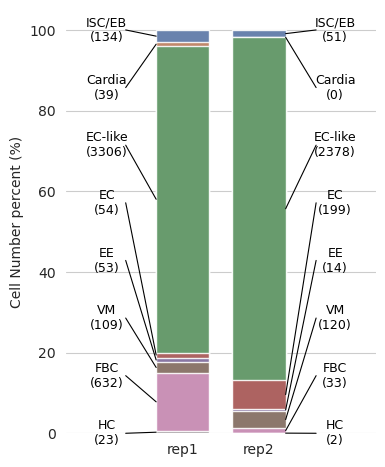

In [96]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(4, 5.5))

    c = sns.color_palette('deep')

    last_pct = np.array([100, 100])
    for i, color in zip(cell_stat.columns[-8:], c):
        sns.barplot(
            y=[0] + list(last_pct) + [0], 
            x=['', 'rep1', 'rep2', ''], 
            color=color, 
            alpha=0.9, 
            order=['', 'rep1', 'rep2', ''],
            width=0.7
        )
        last_pct = last_pct - cell_stat[i].values

    plt.ylabel('Cell Number percent (%)')

    last_pct1 = 100
    last_pct2 = 100
    for i, y in zip(
        cell_stat.columns[1:9], np.linspace(100,0,8)):
        # rep1
        x_r1 = 0
        num = int(cell_stat[cell_stat['batch'] == 'rep1'][i])
        pct = float(cell_stat[cell_stat['batch'] == 'rep1'][f'{i} percent (%)'])
        plt.text(
            x_r1, y, 
            f'{i}\n({num})', 
            va='center', ha='center', 
            color='k', fontsize=9)
        plt.plot(
            (0.25, 0.65), (y, last_pct1 - pct / 2), 
            '-k', lw=0.8, clip_on=False)
        last_pct1 = last_pct1 - pct

        # rep2
        x_r2 = 3
        num = int(cell_stat[cell_stat['batch'] == 'rep2'][i])
        pct = float(cell_stat[cell_stat['batch'] == 'rep2'][f'{i} percent (%)'])
        plt.text(
            x_r2, y, 
            f'{i}\n({num})', 
            va='center', ha='center', 
            color='k', fontsize=9)
        plt.plot(
            (2.75, 2.35), (y, last_pct2 - pct / 2), 
            '-k', lw=0.8, clip_on=False)
        last_pct2 = last_pct2 - pct

    # r1_legend = Rectangle((10, -1), 5, 0.3, color=c[0], clip_on=False, alpha=0.9)
    # plt.text(10 + 6.4, -1 + 0.15, 'midgut rep1', va='center', ha='left')
    # ax.add_patch(r1_legend)

    # r2_legend = Rectangle((50, -1), 5, 0.3, color=c[3], clip_on=False, alpha=0.9)
    # plt.text(50 + 6.4, -1 + 0.15, 'midgut rep2', va='center', ha='left')
    # ax.add_patch(r2_legend)

    sns.despine(top=True, right=True, bottom=True, left=True, trim=1)

    plt.savefig('./plots/f2.cell_pct_merge.v2.png', dpi=600, bbox_inches='tight')

In [54]:
ax.get_xticks()

array([0, 1, 2, 3])

In [30]:
ax.get_position().y0

0.10999999999999999

# plot stack dot plot

In [79]:
marker_genes

{'ISC/EB': ['AAEL013544', 'AAEL025606'],
 'Cardia': ['AAEL004522'],
 'EC-like': ['AAEL008769', 'AAEL009330'],
 'EC': ['AAEL017445'],
 'EE': ['AAEL002769', 'AAEL002733'],
 'VM': ['AAEL001673'],
 'FBC': ['AAEL008789'],
 'HC': ['AAEL008658']}

In [81]:
g_n = {
    'AAEL013544': 'Klu',
    'AAEL025606': 'Delta',
    'AAEL004522': 'Gambicin',
    'AAEL008769': 'SP24D',
    'AAEL009330': 'AeCA',
    'AAEL017445': 'Nubbin',
    'AAEL002769': 'Prospero',
    'AAEL002733': 'NPF',
    'AAEL001673': 'Actin',
    'AAEL008789': 'ApoLp-III',
    'AAEL008658': 'LRIM16',
}

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cm

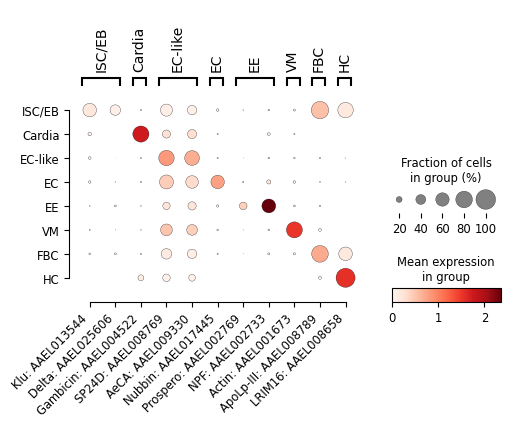

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sc.pl.dotplot(
    adata, 
    marker_genes,
    groupby='cluster_name',
    # use_raw=True, 
    dendrogram=False,
    # cmap='Blues',
    show=False,
)

axm = ax['mainplot_ax']

axm.set_xticklabels(
    [g_n[i.get_text()] + f': {i.get_text()}' for i in axm.get_xticklabels()],
    rotation=45, ha='right')
# axm.set_yticklabels(marker_genes.keys())

sns.despine(top=True, right=True, trim=1, ax=axm)

plt.savefig('./plots/f2.dotplot.merge.png', dpi=600, bbox_inches='tight')

# plot markers on UMAP

In [17]:
def rep_umap_to_ref_ump(adata_rep, adata_ref, batch):
    adata_rep = adata_rep.copy()
    adata_ref = adata_ref.copy()

    rep_index = adata_ref.obs[adata_ref.obs['batch'] == batch].index

    cluster_name = adata_ref.obs.loc[rep_index, 'cluster_name']
    cluster_name.index = cluster_name.index.map(lambda x: '-'.join(x.split('-')[:2]))

    adata_rep.obs['cluster_name'] = cluster_name

    adata_rep.obsm['X_umap_raw'] = adata_rep.obsm['X_umap']

    ref_umap = pd.DataFrame(adata_ref[rep_index, :].obsm['X_umap'], index=rep_index)
    ref_umap.index = ref_umap.index.map(lambda x: '-'.join(x.split('-')[:2]))
    ref_umap = ref_umap.loc[adata_rep.obs_names, :]

    adata_rep.obsm['X_umap'] = ref_umap.values

    return adata_rep.copy()

In [16]:
def plot_umap_violin_rep(adata, adata1, adata2, marker, cluster, exp_max, ofile):

    import matplotlib.pyplot as plt
    import seaborn as sns

    fig = plt.figure(figsize=(8, 3))

    ax1 = plt.subplot(121)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(224)
    # ax4 = 

    sc.pl.umap(
        adata,
        color=marker,
        vmax='p99.8',
        vmin=0,
        frameon=True,
        cmap="Reds",
        colorbar_loc=None,
        title=None,
        ax=ax1, show=False
    )

    ax1.arrow(
        -6.5, -3, 0, 3, 
        width=0.01, head_width=0.2, overhang=0.3, 
        color='k', zorder=10)
    ax1.arrow(
        -6.5, -3, 3, 0, 
        width=0.01, head_width=0.2, overhang=0.3,
        color='k', zorder=10)

    ax1.text(-3.1, -3, 'UMAP-1', ha='left', va='center', fontsize=8)
    ax1.text(-6.5, 0.8, 'UMAP-2', ha='center', va='bottom', rotation=90, fontsize=8)

    ax1.set_title('')
    ax1.set_xlabel('')
    ax1.set_ylabel('')

    ax1.set_xlim(-7.5, 21)
    ax1.set_ylim(-3.6, 16)

    sc.pl.violin(
        rep_umap_to_ref_ump(adata1, adata, 'rep1'),
        marker,
        groupby='cluster_name',
        ax=ax2, show=False
    )

    ax2.set_title('Rep1')

    ax2.set_xlabel('')
    ax2.set_xticklabels([])

    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel(' Expression')
    ax2.set_yticks([0,exp_max], [0,exp_max])
    ax2.tick_params(axis='y', right=True)
    sns.despine(top=True, bottom=True, left=True, right=False, trim=1, ax=ax2)

    sc.pl.violin(
        rep_umap_to_ref_ump(adata2, adata, 'rep2'),
        marker,
        groupby='cluster_name',
        ax=ax3, show=False
    )
    ax3.set_xlabel('')
    ax3.set_xticklabels(
        [i.get_text() for i in ax3.get_xticklabels()],
        rotation=30, ha='right'
    )

    ax3.set_title('Rep2')

    ax3.yaxis.set_label_position("right")
    ax3.set_ylabel(' Expression')
    ax3.set_yticks([0,exp_max], [0,exp_max])
    ax3.tick_params(axis='y', right=True)
    sns.despine(top=True, left=True, right=False, trim=1, ax=ax3)

    # plot title
    ax1.plot((-6.5, 50), (19,19), '-k', clip_on=False, zorder=100)
    ax1.text((-6.5 + 50) / 2, 19.2, f'{cluster} ({marker})', ha='center', va='bottom')

    plt.subplots_adjust(
        hspace=0.3, wspace=0.01)

    plt.savefig(ofile, dpi=600, bbox_inches='tight')

In [84]:
marker_genes

{'ISC/EB': ['AAEL013544', 'AAEL025606'],
 'Cardia': ['AAEL004522'],
 'EC-like': ['AAEL008769', 'AAEL009330'],
 'EC': ['AAEL017445'],
 'EE': ['AAEL002769', 'AAEL002733'],
 'VM': ['AAEL001673'],
 'FBC': ['AAEL008789'],
 'HC': ['AAEL008658']}

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Fut

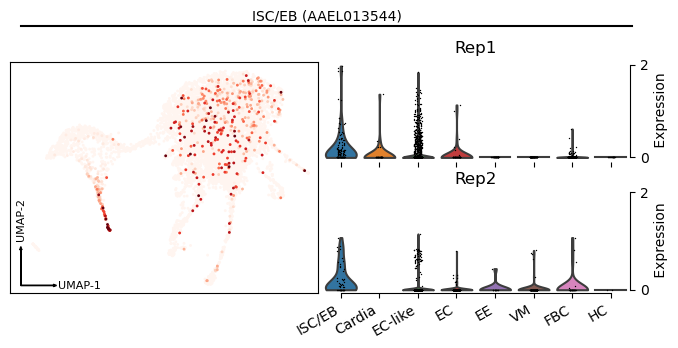

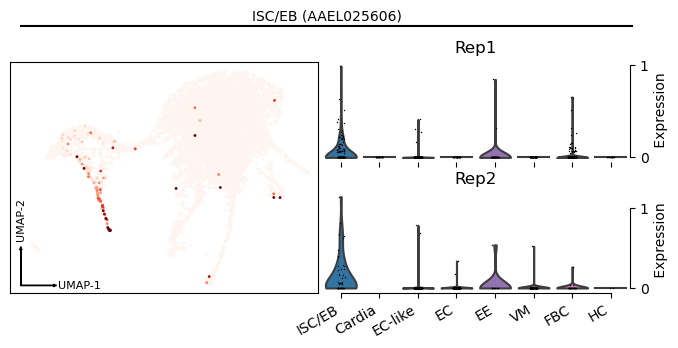

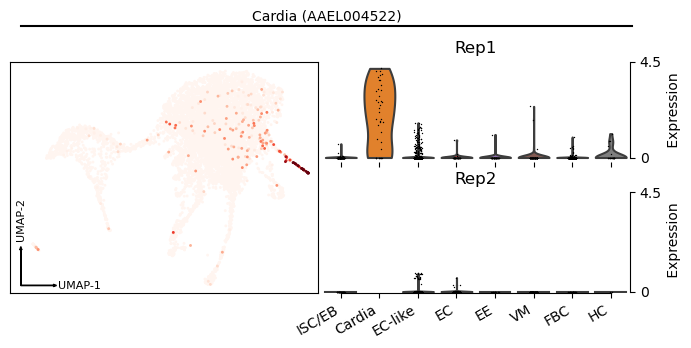

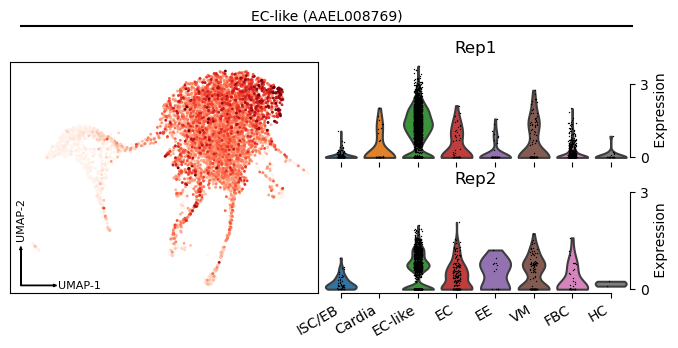

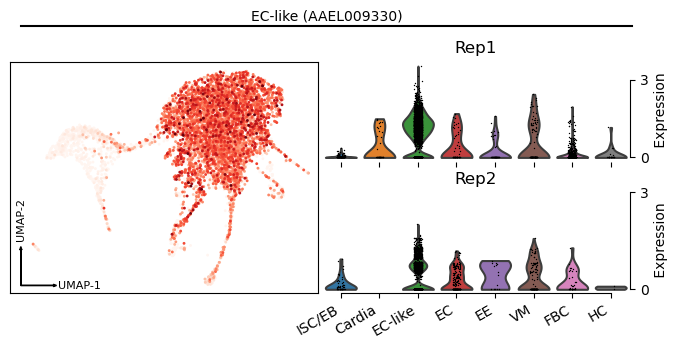

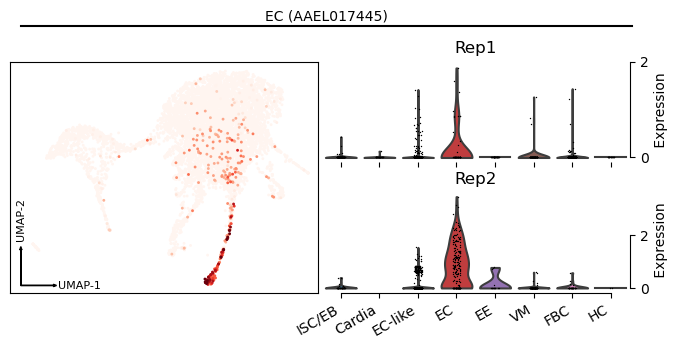

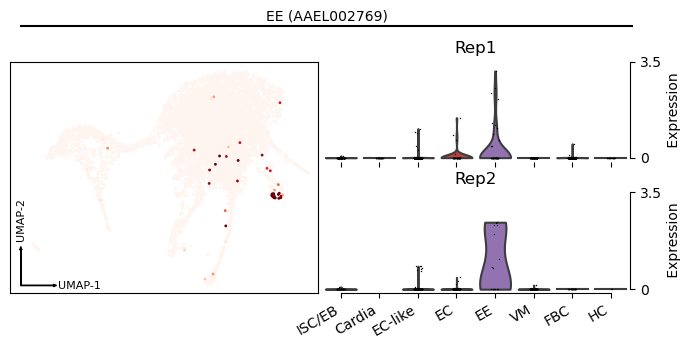

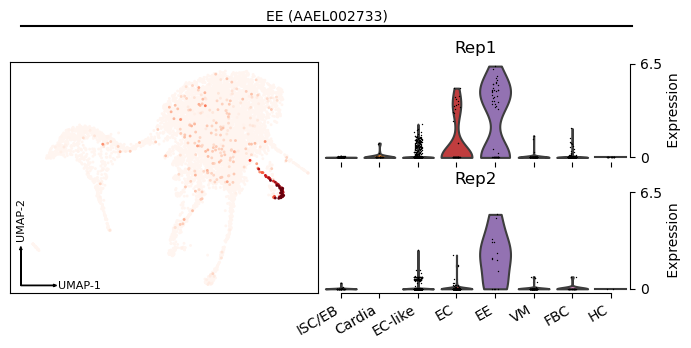

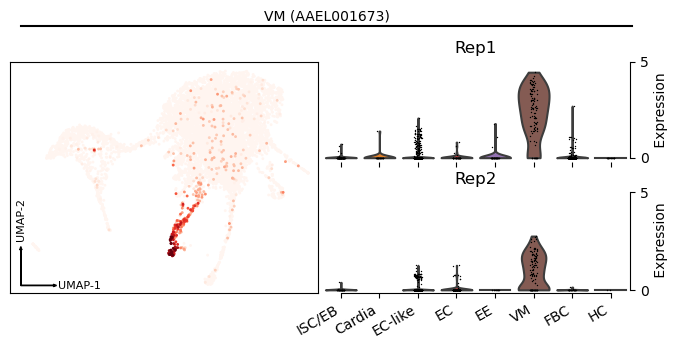

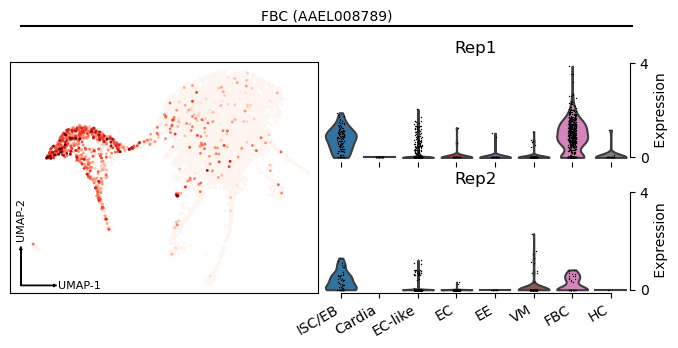

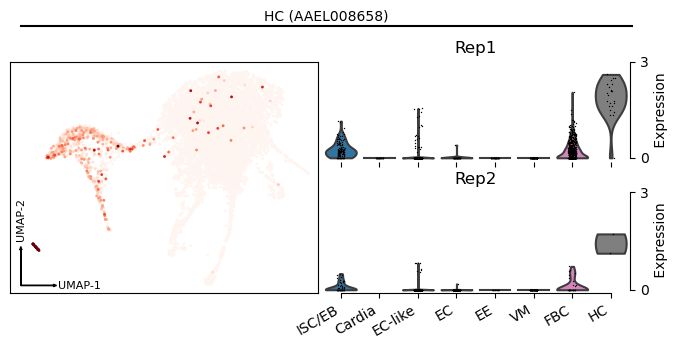

In [87]:
marker_ymax_dct = {
    'AAEL013544': 2,
    'AAEL025606': 1,
    'AAEL004522': 4.5,
    'AAEL008769': 3,
    'AAEL009330': 3,
    'AAEL017445': 2,
    'AAEL002769': 3.5,
    'AAEL002733': 6.5,
    'AAEL001673': 5,
    'AAEL008789': 4,
    'AAEL008658': 3,
}

for cluster in marker_genes.keys():
    for marker in marker_genes[cluster]:
        ofile = f"./umap_plots/{cluster.replace('/', '-')}.{marker}.png"

        plot_umap_violin_rep(
            adata, adata1, adata2, 
            marker, cluster, 
            marker_ymax_dct[marker], 
            ofile,
        )

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Fut

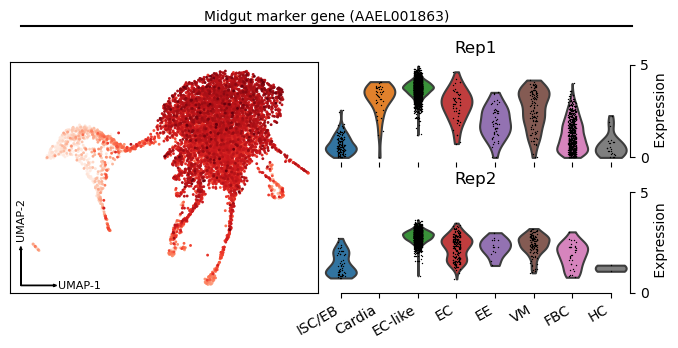

In [19]:
plot_umap_violin_rep(
    adata, adata1, adata2, 
    'AAEL001863', 'Midgut marker gene', 
    5, 
    './umap_plots/Midgut_marker_gene.png',
)

# get marker genes

In [15]:
sc.tl.rank_genes_groups(
    adata, 
    "cluster_name", 
    method="wilcoxon", 
    pts=True, 
    key_added='rank_genes_groups.wilcoxon'
)

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [16]:
sc.tl.filter_rank_genes_groups(
    adata,
    key="rank_genes_groups.wilcoxon",
    key_added="rank_genes_groups.wilcoxon.filter",
)

In [17]:
adata.uns['rank_genes_groups.wilcoxon']

{'params': {'groupby': 'cluster_name',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'pts':               ISC/EB    Cardia   EC-like        EC        EE        VM  \
 AAEL000001  0.237838  0.000000  0.024279  0.071146  0.044776  0.021834   
 AAEL000004  0.172973  0.025641  0.011612  0.015810  0.014925  0.004367   
 AAEL000005  0.064865  0.000000  0.005454  0.003953  0.014925  0.017467   
 AAEL000006  0.005405  0.000000  0.000000  0.000000  0.000000  0.000000   
 AAEL000008  0.097297  0.000000  0.006685  0.083004  0.044776  0.004367   
 ...              ...       ...       ...       ...       ...       ...   
 AAEL029119  0.000000  0.000000  0.000000  0.003953  0.000000  0.000000   
 AAEL029120  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 AAEL029121  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 AAEL029122  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 AAEL0

In [18]:
name = pd.DataFrame(adata.uns['rank_genes_groups.wilcoxon.filter']['names'])
padj = pd.DataFrame(adata.uns['rank_genes_groups.wilcoxon.filter']['pvals_adj'])
lgFC = pd.DataFrame(adata.uns['rank_genes_groups.wilcoxon.filter']['logfoldchanges'])
scores = pd.DataFrame(adata.uns['rank_genes_groups.wilcoxon']['scores'])
pts = adata.uns['rank_genes_groups.wilcoxon.filter']['pts']
pts_rest = adata.uns['rank_genes_groups.wilcoxon.filter']['pts_rest']

dfs = []
for cluster in name.columns:
    df = pd.concat(
        [
            name[cluster].dropna(), 
            padj[cluster].dropna(), 
            lgFC[cluster].dropna(),
            scores[cluster].dropna(),
        ], 
        axis=1
    )
    df.columns = ['names', 'pvals_adj', 'logfoldchanges', 'scores']
    df.set_index(['names'], inplace=True)

    pts_df = pd.concat([pts[[cluster]], pts_rest[[cluster]]], axis=1)
    pts_df.columns = ['pts', 'pts_rest']

    df = df.merge(pts_df, left_index=True, right_index=True, how='inner')
    df['cluster_name'] = cluster

    dfs.append(df)

markg = pd.concat(dfs, axis=0)
markg = markg.sort_values(['cluster_name', 'scores'], ascending=False)

markg

,pvals_adj,logfoldchanges,scores,pts,pts_rest,cluster_name
names,,,,,,
AAEL002572,7.992656e-95,7.283950,21.132055,0.834061,0.056664,VM
AAEL012207,1.255115e-92,7.337896,20.858822,0.820961,0.039751,VM
AAEL019525,2.395239e-88,7.429380,20.362082,0.799127,0.028910,VM
AAEL019799,1.169283e-83,7.486087,19.811659,0.777293,0.026597,VM
AAEL010205,1.088346e-81,7.456187,19.570719,0.768559,0.025441,VM
...,...,...,...,...,...,...
AAEL006820,1.000000e+00,1.083406,1.333760,0.282051,0.166573,Cardia
AAEL000902,1.000000e+00,1.002790,1.262711,0.282051,0.175014,Cardia
AAEL010065,1.000000e+00,1.173967,1.232400,0.256410,0.150253,Cardia


In [19]:
marker_genes

{'ISC/EB': ['AAEL013544', 'AAEL025606'],
 'Cardia': ['AAEL004522'],
 'EC-like': ['AAEL008769', 'AAEL009330'],
 'EC': ['AAEL017445'],
 'EE': ['AAEL002769', 'AAEL002733'],
 'VM': ['AAEL001673'],
 'FBC': ['AAEL008789'],
 'HC': ['AAEL008658']}

In [20]:
markg.to_csv('./marker_genes.csv')